<a href="https://colab.research.google.com/github/luciaemiliaeu/Enem2019/blob/main/Enem2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
import matplotlib.patheffects as PathEffects

fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(fonte)
dados.head()


,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [ ]:
dados.info(verbose=True, null_counts=True)

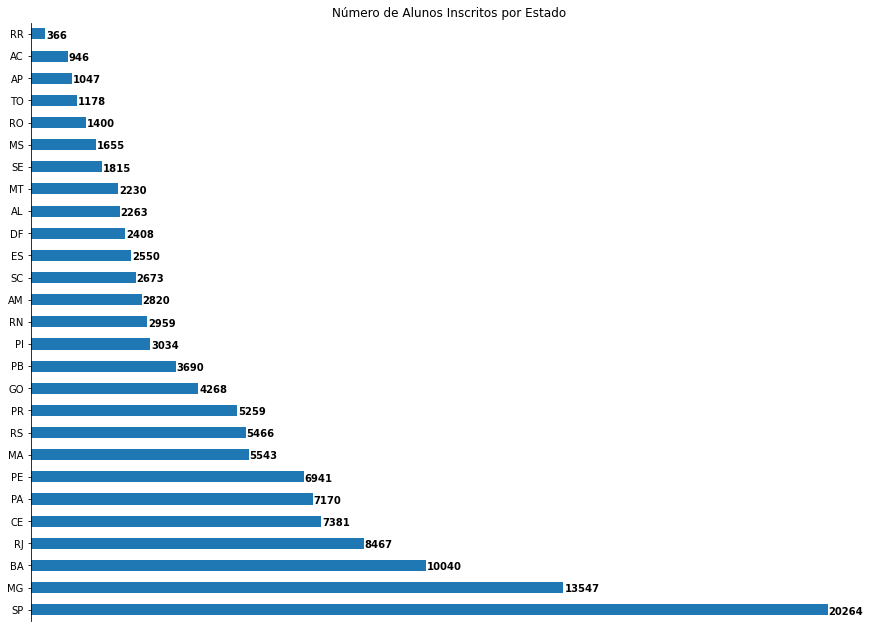

In [4]:
ax = dados['SG_UF_RESIDENCIA'].value_counts().plot.barh(figsize=(15,11), title= 'Número de Alunos Inscritos por Estado')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)

for i,n in enumerate(dados['SG_UF_RESIDENCIA'].value_counts()):
  ax.text(n+25, i-.2, str(n), fontweight = 'bold')

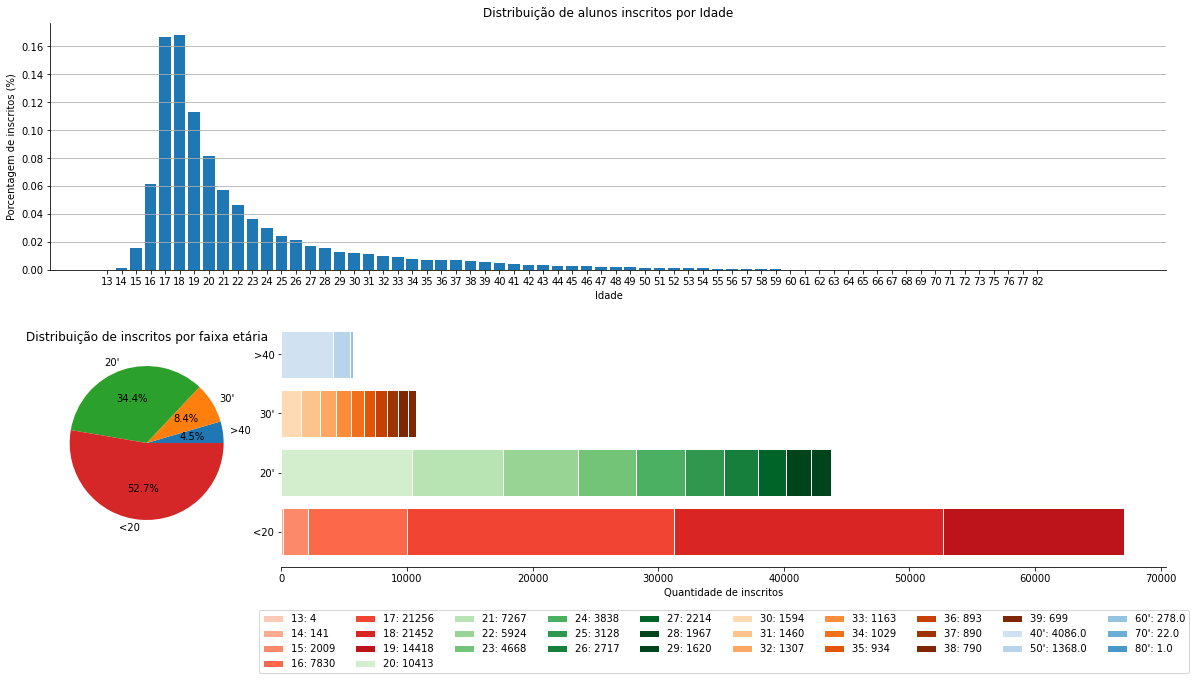

In [143]:
fig = plt.figure(figsize=(20,10))
gspec = gridspec.GridSpec(4,5)
plt.subplots_adjust(hspace=0.5)

#Plotagem da proporção de inscritos por idade
idade = dados['NU_IDADE'].value_counts().sort_index()
proporcao = dados['NU_IDADE'].value_counts(normalize=True).sort_index()
top_histogram = plt.subplot(gspec[0:2,0:])
top_histogram.bar(proporcao.index, proporcao.values)
top_histogram.set_xticks(range(proporcao.index.min(),proporcao.index.min()+ len(proporcao)))
top_histogram.set_xticklabels(proporcao.index)
top_histogram.set_ylabel('Porcentagem de inscritos (%)')
top_histogram.set_xlabel('Idade')
top_histogram.spines['right'].set_visible(False)
top_histogram.spines['top'].set_visible(False)
top_histogram.grid(axis='y')
top_histogram.set_title('Distribuição de alunos inscritos por Idade')

#Plotagem do gráfico de pizza com a porcentagem de inscritos por faixa etária
side_pieChart = plt.subplot(gspec[2:,0])
def faixa(x):
  if x >=13 and x <=19: return "<20"
  elif x <=29: return "20'"
  elif x <=39: return "30'"
  else: return ">40"

proporcao_2 = pd.DataFrame(idade)
proporcao_2['Rate_NU_IDADE'] = proporcao_2['NU_IDADE']*0.01
proporcao_2['Idade'] = proporcao_2.index
proporcao_2 = proporcao_2.reset_index(drop=True)
proporcao_2['FaixaEtaria'] = proporcao_2.apply(lambda x: faixa(x.Idade), axis=1)
faixaEtaria = proporcao_2.groupby('FaixaEtaria').agg("sum").sort_values(by='Rate_NU_IDADE')
side_pieChart.pie(faixaEtaria['Rate_NU_IDADE'], autopct='%1.1f%%', labels= faixaEtaria.index)
side_pieChart.set_title('Distribuição de inscritos por faixa etária')

#Plotagem do gráfico de barras dividido por faixa etária
def decada(x):
  if x <=49: return "40'"
  elif x <=59: return "50'"
  elif x <=69: return "60'"
  elif x <=79: return "70'"
  else: return "80'"

barChart_faixaEtaria = plt.subplot(gspec[2:,1:])
colors = ['Reds', 'Greens', 'Oranges', 'Blues']
for faixa, color in zip(proporcao_2['FaixaEtaria'].unique(), colors):
  cmap = plt.get_cmap(color)
  bottom = 0
  if faixa !=  ">40":
    proporcao_3 = proporcao_2[proporcao_2['FaixaEtaria'] == faixa].set_index("Idade", drop=True).T.drop(['FaixaEtaria', 'Rate_NU_IDADE'])
    for column, cl in zip(proporcao_3.columns, range(len(proporcao_3.columns))):
      height = proporcao_3[column]['NU_IDADE']
      barChart_faixaEtaria.barh(faixa, width=height, label='{}: {}'.format(column,height), left=bottom, color=cmap(0.1*cl+0.2), edgecolor='w')
      bottom += proporcao_3[column]
  else:
    proporcao_3 = proporcao_2.loc[proporcao_2[proporcao_2['FaixaEtaria'] == faixa].index]
    proporcao_3['Decada_Idade'] = proporcao_2.apply(lambda x: decada(x.Idade), axis=1)
    proporcao_3 = proporcao_3.groupby('Decada_Idade').agg("sum").T.drop(['Rate_NU_IDADE', 'Idade']).rename(index={'NU_IDADE':">40"})
    for column, cl in zip(proporcao_3.columns, range(len(proporcao_3.columns))):
      height = proporcao_3[column].to_numpy()[0]
      barChart_faixaEtaria.barh(">40", width=height, label='{}: {}'.format(column,height), left=bottom, color=cmap(0.1*cl+0.2), edgecolor='w')
      bottom += proporcao_3[column]

barChart_faixaEtaria.legend( bbox_to_anchor=(0.5,-0.43), loc='lower center', borderaxespad=0., ncol=10)
barChart_faixaEtaria.spines['right'].set_visible(False)
barChart_faixaEtaria.spines['top'].set_visible(False)
barChart_faixaEtaria.spines['left'].set_visible(False)
barChart_faixaEtaria.set_xlabel('Quantidade de inscritos')
plt.show()


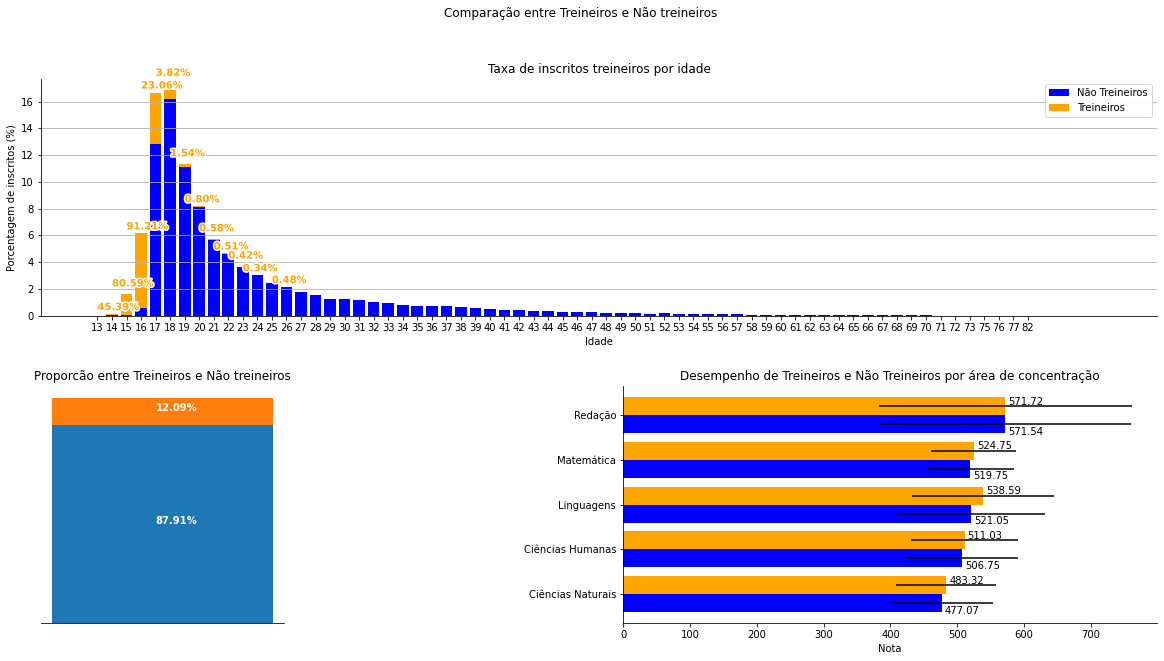

In [142]:
dados['IN_TREINEIRO']
treineiros = dados.loc[dados[dados['IN_TREINEIRO']==1].index].index
fig = plt.figure(figsize=(20,10))
fig.suptitle('Comparação entre Treineiros e Não treineiros')
gspec = gridspec.GridSpec(2,4)
plt.subplots_adjust(hspace=0.3)

#Plotagem da proporção de inscritos treineiros por idade
top_histogram = plt.subplot(gspec[0,0:])

idade_treineiros = dados.loc[treineiros]['NU_IDADE'].value_counts().sort_index()
idade_nao_treineiros = dados.drop(index=treineiros)['NU_IDADE'].value_counts().sort_index()
proporcao_nao_treineiros = (idade_nao_treineiros / dados.shape[0] )*100
proporcao_treineiros = (idade_treineiros / dados.shape[0])*100
repetido = proporcao_treineiros.index.intersection(proporcao_nao_treineiros.index)

top_histogram.bar(proporcao_nao_treineiros.loc[repetido].index, 
                  proporcao_nao_treineiros.loc[repetido].values, 
                  label='Não Treineiros', color='b')
top_histogram.bar(proporcao_nao_treineiros.drop(index=repetido).index, 
                  proporcao_nao_treineiros.drop(index=repetido).values,
                  color='b')
top_histogram.bar(proporcao_treineiros.loc[repetido].index, 
                  proporcao_treineiros.loc[repetido].values, 
                  bottom = proporcao_nao_treineiros.loc[repetido].values, 
                  label='Treineiros', color='orange')
top_histogram.bar(proporcao_treineiros.drop(index=repetido).index,
                  proporcao_treineiros.drop(index=repetido).values,
                  color='orange')
for i in repetido:
  if proporcao_treineiros.loc[i]>0.01:
    height = proporcao_treineiros.loc[i] + proporcao_nao_treineiros.loc[i]
    if i in [15,19,21,23]: height += 0.3
    elif i == 18 : height += 0.8
    pct = (proporcao_treineiros.loc[i]/ height) * 100
    text = (top_histogram
            .text(i-1,height+0.3,'{0:0.2f}%'.format(pct), color='orange', fontweight = 'bold' )
            .set_path_effects([PathEffects.withStroke(linewidth=3, foreground='w')]))
    
top_histogram.set_xticks(range(proporcao.index.min(),proporcao.index.min()+ len(proporcao)))
top_histogram.set_xticklabels(proporcao.index)
top_histogram.set_ylabel('Porcentagem de inscritos (%)')
top_histogram.set_xlabel('Idade')
top_histogram.spines['right'].set_visible(False)
top_histogram.spines['top'].set_visible(False)
top_histogram.grid(axis='y')
top_histogram.legend()
top_histogram.set_title('Taxa de inscritos treineiros por idade')

# Plotagem do gráfico de comparação entre o total de treineiros e não treineiros
sideChatL = plt.subplot(gspec[1,0])
sideChatL.bar(0, dados.drop(index=treineiros).shape[0], )
sideChatL.bar(0, len(treineiros), 
              bottom=dados.drop(index=treineiros).shape[0])

sideChatL.text(-0.025, dados.drop(index=treineiros).shape[0]/2, 
               '{0:.2f}%'.format(dados.drop(index=treineiros).shape[0]/dados.shape[0]*100),
               fontweight = 'bold', color='w' )
sideChatL.text(-0.025, dados.drop(index=treineiros).shape[0] + len(treineiros)/2,
               '{0:.2f}%'.format(len(treineiros)/dados.shape[0]*100), 
               fontweight = 'bold', color='w' )

sideChatL.set_title('Proporcão entre Treineiros e Não treineiros')
sideChatL.spines['right'].set_visible(False)
sideChatL.spines['top'].set_visible(False)
sideChatL.spines['left'].set_visible(False)
sideChatL.get_yaxis().set_visible(False)
sideChatL.get_xaxis().set_visible(False)


#Plotagem do gráfio de comparação do desempenhos de treineiros e não treineiros por área
provas =  ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
desempenho_media = (dados
              .groupby("IN_TREINEIRO")
              .agg("mean")[provas])
desempenho_std = (dados
              .groupby("IN_TREINEIRO")
              .agg("std")[provas])
sideChartH = plt.subplot(gspec[1,2:])
labels = ['Ciências Naturais', 'Ciências Humanas', 'Linguagens', 'Matemática', 'Redação']
y = np.arange(len(labels))
lenght = 0.40

rects1 = sideChartH.barh(y-lenght/2, desempenho_media.loc[0], lenght, 
                         label='Não treineiros', color = 'b', xerr=desempenho_std.loc[0])
rects2 = sideChartH.barh(y+lenght/2, desempenho_media.loc[1], lenght, 
                         label='Treineiros', color='orange', xerr=desempenho_std.loc[1])

def label(rects, ypos='center'):
  offset = {'center': 0, 'top': 2, 'bottom': -2}

  for rect in rects:
    width = rect.get_width()
    sideChartH.annotate('{0:.2f}'.format(width),
                        xy=(width, rect.get_y()+0.1),
                        xytext=(3, offset[ypos]*3),
                        textcoords="offset points")
label(rects1, 'bottom')
label(rects2, 'top')

sideChartH.set_title('Desempenho de Treineiros e Não Treineiros por área de concentração')
sideChartH.spines['right'].set_visible(False)
sideChartH.spines['top'].set_visible(False)
sideChartH.set_yticks(y)
sideChartH.set_yticklabels(labels)
sideChartH.set_xlabel('Nota')

plt.show()


In [1]:
import seaborn as sns

